In [1]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime, timedelta

# 設置MySQL資料庫連接
db_user = 'root'
db_password = '19970730'
db_host = '127.0.0.1'
db_name = 'sql_stock'

# 創建資料庫連接引擎
engine = create_engine(f'mysql+mysqlconnector://{db_user}:{db_password}@{db_host}/{db_name}')

# 設置日期範圍
#today = datetime(2024, 5, 25)
today = datetime.now().date()
one_year_ago = today - timedelta(days=720)

# 格式化日期
today_str = today.strftime('%Y%m%d')
one_year_ago_str = one_year_ago.strftime('%Y%m%d')

# 全撈 
one_year_ago_str = '20200101'

# SQL 查詢 加權指數
query_twse = f"""
SELECT *
FROM daily_twse
WHERE date >= '{one_year_ago_str}' AND date <= '{today_str}'
"""

# SQL 查詢 個股
query_stock = f"""
SELECT *
FROM daily_price
WHERE date >= '{one_year_ago_str}' AND date <= '{today_str}'
"""

# SQL 查詢 細產業
query_sub_category = f"""
SELECT *
FROM sub_category
"""

# 使用 pd.read_sql 來執行查詢並讀取數據到 DataFrame
twse_df_raw = pd.read_sql(query_twse, engine)

stock_df_raw = pd.read_sql(query_stock, engine)

sub_category_list = pd.read_sql(query_sub_category, engine)



              Date  證券代號  證券名稱    成交股數  成交筆數       成交金額    開盤價    最高價    最低價  \
1294081 2024-01-02  6584  南俊國際   62051    63    5296571   86.2   86.2   84.9   
1295902 2024-01-03  6584  南俊國際   45081    51    3818050   85.0   85.0   84.2   
1297723 2024-01-04  6584  南俊國際   34600    77    2933799   84.4   85.0   84.3   
1299544 2024-01-05  6584  南俊國際   23009    23    1957665   84.5   85.5   84.5   
1301365 2024-01-08  6584  南俊國際   74601   181    6408229   85.2   87.9   85.0   
...            ...   ...   ...     ...   ...        ...    ...    ...    ...   
1560310 2024-08-12  6584  南俊國際  416190   379   69117967  164.5  171.5  162.0   
1562161 2024-08-13  6584  南俊國際  386456   331   64787396  168.0  170.5  165.0   
1564013 2024-08-14  6584  南俊國際  371419   345   64542687  172.0  177.0  171.0   
1565865 2024-08-15  6584  南俊國際  393850   386   70912399  175.0  184.0  172.0   
1567717 2024-08-16  6584  南俊國際  752578  1063  135915201  189.0  189.0  176.0   

           收盤價  ...      60RS   20RS_sd

C:\Users\USER\AppData\Local\Temp\ipykernel_11560\1146150862.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, '60RS_rank_mean'] = filtered_df['60RS_rank'].rolling(30).mean()


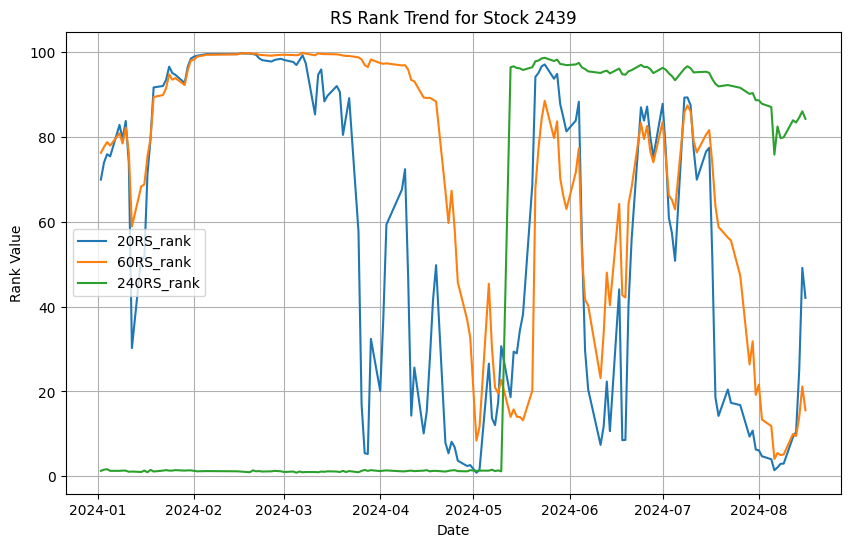

In [51]:
stock_df_raw['Date'] = pd.to_datetime(stock_df_raw['Date'])
stock_df_year = stock_df_raw[(stock_df_raw['Date']>'2024-01-01' ) & (stock_df_raw['Date']<'2024-12-07' )]
# filtered_df = stock_df_year[stock_df_year['證券代號'] == '3715']
# filtered_df['20RS_rank'].head(50)
filtered_df = stock_df_year[stock_df_year['證券代號'] == '6584']
filtered_df.loc[:, '60RS_rank_mean'] = filtered_df['60RS_rank'].rolling(30).mean()
print(filtered_df)

# 60日線的RS千萬不能低於80


import matplotlib.pyplot as plt

# 過濾出符合條件的資料
filtered_df = stock_df_year[stock_df_year['證券代號'] == '6584']
# 如果日期欄位不是索引，將其設定為索引
filtered_df = filtered_df.set_index('Date')
# 繪製折線圖
plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['20RS_rank'], label='20RS_rank')
plt.plot(filtered_df.index, filtered_df['60RS_rank'], label='60RS_rank')
plt.plot(filtered_df.index, filtered_df['240RS_rank'], label='240RS_rank')

# 標題和標籤
plt.title('RS Rank Trend for Stock 2439')
plt.xlabel('Date')
plt.ylabel('Rank Value')
plt.legend()

# 顯示圖表
plt.grid(True)
plt.show()


              Date  證券代號  證券名稱      成交股數   成交筆數        成交金額     開盤價     最高價  \
1065906 2023-07-03  3715  定穎投控   4650876   1767   128394162   27.30   27.85   
1067706 2023-07-04  3715  定穎投控   9896900   4228   283044416   27.75   29.25   
1069505 2023-07-05  3715  定穎投控  19063953   7370   577530831   28.90   30.85   
1071304 2023-07-06  3715  定穎投控  34643444  13639  1119858106   30.55   33.35   
1073103 2023-07-07  3715  定穎投控  19572074   8066   612164248   32.25   32.65   
...            ...   ...   ...       ...    ...         ...     ...     ...   
1253510 2023-11-30  3715  定穎投控  46530205  26341  4740589910  100.00  104.00   
1255321 2023-12-01  3715  定穎投控  77766387  40901  8412081453  102.50  112.00   
1257132 2023-12-04  3715  定穎投控  54224028  31503  5666856365  109.00  110.50   
1258942 2023-12-05  3715  定穎投控  27631831  17783  2684470208   99.50   99.70   
1260755 2023-12-06  3715  定穎投控  30882657  21806  3024065193   98.00  100.00   

            最低價     收盤價  ...     60MA      60RS   2

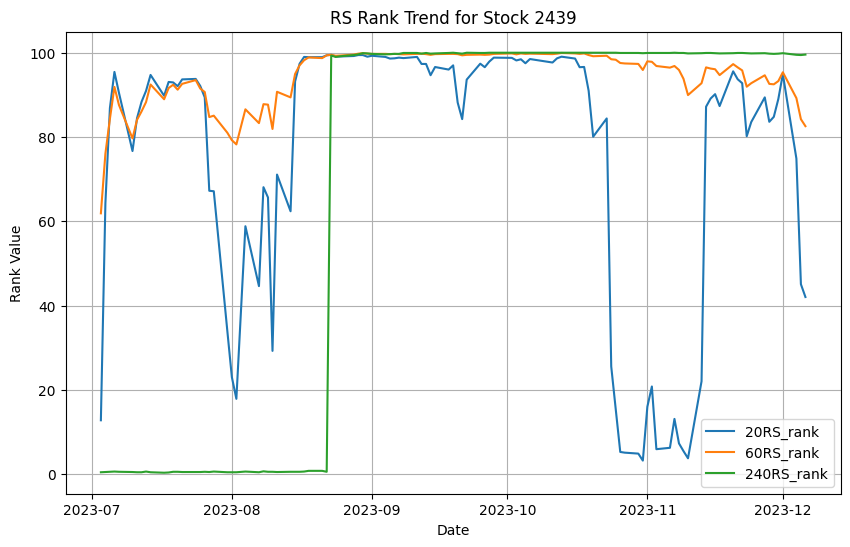

In [ ]:
# # 驗證一下60RS 都大於80的股票是不是表現很好

# today_str = '2023-01-03'
# stock_df_raw['Date'] = pd.to_datetime(stock_df_raw['Date'])
# stock_df_today = stock_df_raw[stock_df_raw['Date'] == today_str].copy() 

# today_list = stock_df_today[(stock_df_today['成交金額']>500000000)]

# # 計算一年內高點
# stock_id_list = today_list['證券代號'].unique().tolist()

# stock_id_filter = []
# for i in stock_id_list:
#         if((len(i)==4) ): #1. 排除債 ETF等等 2.排除新掛牌資料不到calculate_day天
#                 #print(i)
#                 # 計算個股 RS
#                 temp_df = stock_df_raw[stock_df_raw['證券代號']==i].copy()
#                 temp_df.loc[:, '60RS_rank_min'] = temp_df['60RS_rank'].rolling(30).min()
#                 RS_rank_min = temp_df[temp_df['Date'] == today_str]['60RS_rank_min'].iloc[0]

#                 if(RS_rank_min > 80):
#                     stock_id_filter.append(i) 


# filter_stock_today = stock_df_today[stock_df_today['證券代號'].isin(stock_id_filter)]
# filter_stock_today

,Date,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,...,60MA,60RS,20RS_sd,20RS_rank,60RS_sd,60RS_rank,240MA,240RS,240RS_sd,240RS_rank
862793,2023-01-03,1590,亞德客-KY,579307,555,538112678,931.00,944.0,907.0,930.00,...,848.8500,109.5600,1.012958,63.402350,1.074307,85.730274,873.7875,106.4332,1.162682,80.973699
862802,2023-01-03,1605,華新,76317803,32852,3546814012,47.25,47.6,46.0,46.95,...,42.7292,109.8781,1.005697,51.986570,1.077426,86.345831,37.2298,126.1087,1.377618,94.236150
862842,2023-01-03,1760,寶齡富錦,12029307,8188,2140747616,178.50,181.0,175.5,175.50,...,159.6833,109.9050,1.008234,56.183548,1.077690,86.457750,126.4796,138.7576,1.515796,96.586458
862854,2023-01-03,1795,美時,13202785,9303,3303666707,249.50,253.5,247.0,250.50,...,200.0750,125.2030,1.049999,86.849468,1.227697,96.866256,149.1196,167.9860,1.835088,99.048685
862920,2023-01-03,2201,裕隆,17977933,9919,1134026392,62.10,64.1,61.7,63.20,...,54.1375,116.7398,1.018941,71.684387,1.144710,93.508674,45.4231,139.1362,1.519931,96.754337
862952,2023-01-03,2327,國巨,1741813,2314,798582129,450.00,466.5,446.0,465.50,...,410.4250,113.4190,1.002475,46.446558,1.112147,91.214326,393.8083,118.2047,1.291275,90.822608
862959,2023-01-03,2338,光罩,6907751,4396,593569061,84.00,87.9,83.1,87.50,...,74.0933,118.0943,0.999755,41.913822,1.157992,94.348069,80.6450,108.5002,1.185262,84.107443
863236,2023-01-03,3034,聯詠,11770294,12032,3858609275,313.00,334.5,312.5,334.50,...,281.5167,118.8207,1.106110,95.243425,1.165114,94.739787,337.0125,99.2545,1.084262,63.458310
863393,2023-01-03,3454,晶睿,13864170,9830,2748226203,195.00,206.5,189.0,206.50,...,176.9917,116.6722,1.001176,44.208170,1.144047,93.452714,110.0704,187.6072,2.049431,99.328483
863413,2023-01-03,3515,華擎,10907247,8619,1625762023,143.50,152.0,143.5,149.00,...,117.5867,126.7150,1.103308,94.963626,1.242523,96.978176,142.7975,104.3436,1.139855,77.504197


In [67]:
# 這樣是可以撈到華城 可以回測多筆這樣績效卻沒有很好


# day_list = stock_df_raw[(stock_df_raw['Date']>'2022-12-04' ) & (stock_df_raw['Date']<'2022-12-07' )]
# day_list = day_list['Date'].unique().tolist()
# filter_stock_list = pd.DataFrame(columns=['Date','證券代號','證券名稱','成交股數','成交筆數', '成交金額','開盤價', '收盤價'])


# for day in day_list:
#         today_str = day.strftime('%Y-%m-%d')
#         stock_df_raw['Date'] = pd.to_datetime(stock_df_raw['Date'])
#         stock_df_today = stock_df_raw[stock_df_raw['Date'] == today_str].copy() 

#         # 收盤在季線以上 年線以上 成值 1億 
#         today_list = stock_df_today[(stock_df_today['收盤價']>stock_df_today['60MA']) & 
#                                 (stock_df_today['60MA']>stock_df_today['240MA']) & 
#                                 (stock_df_today['成交金額']>200000000) &
#                                 (stock_df_today['成交股數']>2000000) & 
#                                 (stock_df_today['60RS_rank']>75) ]

#         # 計算一年內高點
#         stock_id_list = today_list['證券代號'].unique().tolist()
        
#         stock_id_filter = []
#         for i in stock_id_list:
#                 if((len(i)==4) ): #1. 排除債 ETF等等 2.排除新掛牌資料不到calculate_day天

#                         # 計算個股 RS
#                         today_df = stock_df_raw[(stock_df_raw['證券代號']==i) & (stock_df_raw['Date'] == today_str) ].copy()
#                         close = today_df['收盤價'].iloc[0]

#                         #print(i)
#                         # 計算個股 RS
#                         temp_df_his = stock_df_raw[(stock_df_raw['證券代號']==i) & (stock_df_raw['Date'] < today_str)  ].copy()
#                         # 一年內高低點
#                         temp_df_his.loc[:, '240DAY_min'] = temp_df_his['收盤價'].rolling(240).min()
#                         temp_df_his.loc[:, '240DAY_max'] = temp_df_his['收盤價'].rolling(240).max()
#                         temp_df_his.loc[:, '240DAY_money'] = temp_df_his['成交金額'].rolling(120).mean()

#                         DAY240_min = temp_df_his.tail(1)['240DAY_min'].iloc[0]
#                         DAY240_max = temp_df_his.tail(1)['240DAY_max'].iloc[0]
#                         DAY240_money = temp_df_his.tail(1)['240DAY_money'].iloc[0]
#                         MA60 = temp_df_his.tail(1)['60MA'].iloc[0] 
                        
#                         # 計算個股 60日RS rank 從原本小於 80 飆上來 
#                         temp_df_his.loc[:, '60RS_rank_mean'] = temp_df_his['60RS_rank'].rolling(30).mean()
#                         RS_rank_mean = temp_df_his.tail(1)['60RS_rank_mean'].iloc[0]


#                         # RS_rank_min = 90
#                         #距離一年高點25%以內
#                         #距離一年低點20%以上
#                         if( (close*1.2 >  DAY240_max) & (close >  DAY240_min*1.2) & (RS_rank_mean <  50) & (DAY240_money < 150000000) & (close < MA60*1.3)):
#                                 stock_id_filter.append(i) 


#         filter_stock_today = stock_df_today[stock_df_today['證券代號'].isin(stock_id_filter)]
#         filter_stock_today = filter_stock_today[['Date','證券代號','證券名稱','成交股數','成交筆數', '成交金額','開盤價', '收盤價']]
#         if (len(filter_stock_today)!=0):
#                 filter_stock_list = pd.concat([filter_stock_list, filter_stock_today], ignore_index=True)



# filter_stock_list

,Date,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,收盤價
0,2022-12-06,1519,華城,16004923,6358,770650186,47.2,48.7


In [208]:
# import pandas as pd
# from multiprocessing import Pool

# def process_day(day, stock_df_raw):
#     today_str = day.strftime('%Y-%m-%d')
#     stock_df_raw['Date'] = pd.to_datetime(stock_df_raw['Date'])
#     stock_df_today = stock_df_raw[stock_df_raw['Date'] == today_str].copy() 

#     # 收盤在季線以上 年線以上 成值 2億
#     today_list = stock_df_today[(stock_df_today['收盤價'] > stock_df_today['60MA']) & 
#                                 (stock_df_today['60MA'] > stock_df_today['240MA']) & 
#                                 (stock_df_today['成交金額'] > 200000000) &
#                                 (stock_df_today['成交股數'] > 2000000) & 
#                                 (stock_df_today['60RS_rank'] > 75)]

#     stock_id_list = today_list['證券代號'].unique().tolist()
#     stock_id_filter = []

#     for i in stock_id_list:
#         if len(i) == 4:
#             today_df = stock_df_raw[(stock_df_raw['證券代號'] == i) & (stock_df_raw['Date'] == today_str)].copy()
#             close = today_df['收盤價'].iloc[0]

#             temp_df_his = stock_df_raw[(stock_df_raw['證券代號'] == i) & (stock_df_raw['Date'] < today_str)].copy()

#             # 計算一年內高低點
#             DAY240_min = temp_df_his['收盤價'].rolling(240).min().iloc[-1]
#             DAY240_max = temp_df_his['收盤價'].rolling(240).max().iloc[-1]
#             DAY240_money = temp_df_his['成交金額'].rolling(120).mean().iloc[-1]
#             MA60 = temp_df_his['60MA'].iloc[-1]

#             RS_rank_mean = temp_df_his['60RS_rank'].rolling(30).mean().iloc[-1]

#             # RS_rank_min = 90
#             #距離一年高點25%以內 距離一年低點20%以上
#             if (close * 1.2 > DAY240_max) and (close > DAY240_min * 1.2) and (RS_rank_mean < 50) and (DAY240_money < 150000000) and (close < MA60 * 1.3):
#                 stock_id_filter.append(i)

#     filter_stock_today = stock_df_today[stock_df_today['證券代號'].isin(stock_id_filter)]
#     filter_stock_today = filter_stock_today[['Date','證券代號','證券名稱','成交股數','成交筆數', '成交金額','開盤價', '收盤價']]
    
#     return filter_stock_today if not filter_stock_today.empty else None


In [ ]:
# if __name__ == '__main__':
#     day_list = stock_df_raw[(stock_df_raw['Date']>'2022-12-04' ) & (stock_df_raw['Date']<'2022-12-07' )]
#     day_list = day_list['Date'].unique().tolist()

#     with Pool(processes=4) as pool:  # 調整 processes 來匹配 CPU 核心數
#         results = pool.starmap(process_day, [(day, stock_df_raw) for day in day_list])

#     # 將所有結果合併
#     filter_stock_list = pd.concat([res for res in results if res is not None], ignore_index=True)


In [156]:
stock_df_raw['Date'] = pd.to_datetime(stock_df_raw['Date'])
day_list = stock_df_raw[(stock_df_raw['Date']>='2023-03-09' ) & (stock_df_raw['Date']<'2023-07-01' )]
day_list = day_list['Date'].unique().tolist()
filter_stock_list = pd.DataFrame(columns=['Date','證券代號','證券名稱','成交股數','成交筆數', '成交金額','開盤價', '收盤價'])
 

for day in day_list:
        today_str = day.strftime('%Y-%m-%d')
        
        stock_df_today = stock_df_raw[stock_df_raw['Date'] == today_str].copy() 

        # 收盤在季線以上 年線以上 成值 1億 
        today_list = stock_df_today[(stock_df_today['收盤價']>stock_df_today['60MA']) & 
                                (stock_df_today['60MA']>stock_df_today['240MA']) & 
                                (stock_df_today['成交金額']>100000000) &
                                (stock_df_today['成交股數']>2000000) & 
                                (stock_df_today['60RS_rank']>75) ]

        # 計算一年內高點
        stock_id_list = today_list['證券代號'].unique().tolist()

        stock_id_filter = []
        for i in stock_id_list:
                if((len(i)==4) ): #1. 排除債 ETF等等 2.排除新掛牌資料不到calculate_day天

                        # 計算個股 RS
                        today_df = stock_df_raw[(stock_df_raw['證券代號']==i) & (stock_df_raw['Date'] == today_str) ].copy()
                        close = today_df['收盤價'].iloc[0]

                        #print(i)
                        # 計算個股 RS
                        temp_df_his = stock_df_raw[(stock_df_raw['證券代號']==i) & (stock_df_raw['Date'] < today_str) & (stock_df_raw['收盤價'] != 0) ].copy()
                        # 一年內高低點
                        temp_df_his.loc[:, '120DAY_min'] = temp_df_his['收盤價'].rolling(120).min()
                        temp_df_his.loc[:, '120DAY_max'] = temp_df_his['收盤價'].rolling(120).max()
                        temp_df_his.loc[:, '120DAY_money'] = temp_df_his['成交金額'].rolling(120).mean()


                        DAY120_min = temp_df_his.tail(1)['120DAY_min'].iloc[0]
                        DAY120_max = temp_df_his.tail(1)['120DAY_max'].iloc[0]


                        DAY240_money = temp_df_his.tail(1)['120DAY_money'].iloc[0]
                        MA20 = temp_df_his.tail(1)['20MA'].iloc[0] 
                        
                        # 計算個股 60日RS rank 從原本小於 80 飆上來 
                        temp_df_his.loc[:, '60RS_rank_mean'] = temp_df_his['60RS_rank'].rolling(30).mean()
                        RS_rank_mean = temp_df_his.tail(1)['60RS_rank_mean'].iloc[0]
                        if (DAY120_min == 0) |  (DAY120_max == 0) :
                                print('DAY240_min = 0 stock_name:' + temp_df_his['證券名稱'].iloc[0] + "today_str" + today_str + "stock_id" + i)
                        else:
                                max_min_diff = abs(DAY120_max - DAY120_min) / DAY120_min 

                                # RS_rank_min = 90
                                #距離一年高點25%以內
                                #距離一年低點20%以上
                                if( (close*1.2 >  DAY120_max) & 
                                (close >  DAY120_min*1.2) & 
                                (RS_rank_mean <  50) & 
                                (DAY240_money < 80000000) & 
                                (close < MA20*1.1) & 
                                (DAY240_money < 80000000) &
                                (max_min_diff < 0.3)):
                                        stock_id_filter.append(i) 


        filter_stock_today = stock_df_today[stock_df_today['證券代號'].isin(stock_id_filter)]
        filter_stock_today = filter_stock_today[['Date','證券代號','證券名稱','成交股數','成交筆數', '成交金額','開盤價', '收盤價']]
        if (len(filter_stock_today)!=0):
                filter_stock_list = pd.concat([filter_stock_list, filter_stock_today], ignore_index=True)


filter_stock_list


,Date,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,收盤價
0,2023-03-10,1339,昭輝,2363188,1769,110362777,44.75,46.45
1,2023-03-15,3038,全台,8123851,3512,198832560,24.35,24.15
2,2023-03-16,4190,佐登-KY,5017107,3930,442868253,85.40,86.10
3,2023-03-21,2387,精元,3767670,2463,162526293,42.60,43.55
4,2023-03-22,2387,精元,2451298,1728,107150720,44.20,43.60
5,2023-03-22,3715,定穎投控,19159920,5584,379071307,19.45,19.55
6,2023-03-28,2331,精英,11548409,4425,273552005,23.55,24.25
7,2023-04-20,3501,維熹,4309832,2896,244953855,55.00,57.60
8,2023-04-21,3501,維熹,4712696,3560,268361560,58.70,55.10
9,2023-04-24,1710,東聯,12152720,4925,255157128,20.40,21.00


In [161]:
today = datetime.now().date()
today.strftime('%Y-%m-%d')

'2024-08-26'

In [2]:
stock_df_raw['Date'] = pd.to_datetime(stock_df_raw['Date'])

day_list = stock_df_raw[(stock_df_raw['Date']>='2024-08-10' ) & (stock_df_raw['Date']<'2024-10-10' )]
day_list = day_list['Date'].unique().tolist()
filter_stock_list = pd.DataFrame(columns=['Date','證券代號','證券名稱','成交股數','成交筆數', '成交金額','開盤價', '收盤價'])


for day in day_list:
        today_str = day.strftime('%Y-%m-%d')
        stock_df_today = stock_df_raw[stock_df_raw['Date'] == today_str].copy() 

        # 收盤在季線以上 年線以上 成值 1億 
        today_list = stock_df_today[(stock_df_today['收盤價']>stock_df_today['60MA']) & 
                                (stock_df_today['60MA']>stock_df_today['240MA']) & 
                                (stock_df_today['成交金額']>100000000) &
                                (stock_df_today['成交股數']>2000000) & 
                                (stock_df_today['60RS_rank']>75) ]

        # 計算一年內高點
        stock_id_list = today_list['證券代號'].unique().tolist()

        stock_id_filter = []
        for i in stock_id_list:
                if((len(i)==4) ): #1. 排除債 ETF等等 2.排除新掛牌資料不到calculate_day天

                        # 計算個股 RS
                        close = stock_df_raw[(stock_df_raw['證券代號']==i) & (stock_df_raw['Date'] == today_str) ]['收盤價'].iloc[0]

                        #print(i)
                        # 計算個股 RS
                        temp_df_his = stock_df_raw[(stock_df_raw['證券代號']==i) & (stock_df_raw['Date'] < today_str) & (stock_df_raw['收盤價'] != 0) ].copy()
                        # 一年內高低點

                        # temp_df_his.loc[:, '120DAY_min'] = temp_df_his['收盤價'].rolling(120).min()
                        # temp_df_his.loc[:, '120DAY_max'] = temp_df_his['收盤價'].rolling(120).max()
                        # temp_df_his.loc[:, '120DAY_money'] = temp_df_his['成交金額'].rolling(120).mean()


                        # DAY120_min = temp_df_his.tail(1)['120DAY_min'].iloc[0]
                        # DAY120_max = temp_df_his.tail(1)['120DAY_max'].iloc[0]
                        temp_df_his_tail = temp_df_his.tail(120)

                        DAY120_min = temp_df_his_tail['收盤價'].min()
                        DAY120_max = temp_df_his_tail['收盤價'].max()


                        DAY240_money = temp_df_his_tail['成交金額'].mean()
                        MA20 = temp_df_his.tail(1)['20MA'].iloc[0] 
                        
                        # 計算個股 60日RS rank 從原本小於 80 飆上來 
                        # temp_df_his.loc[:, '60RS_rank_mean'] = temp_df_his['60RS_rank'].rolling(30).mean()
                        RS_rank_mean = temp_df_his['60RS_rank'].tail(30).mean()
                        if (DAY120_min == 0) |  (DAY120_max == 0) :
                                print('DAY240_min = 0 stock_name:' + temp_df_his['證券名稱'].iloc[0] + "today_str" + today_str + "stock_id" + i)
                        else:
                                max_min_diff = abs(DAY120_max - DAY120_min) / DAY120_min 

                                # RS_rank_min = 90
                                #距離一年高點25%以內
                                #距離一年低點20%以上
                                if( (close*1.2 >  DAY120_max) & 
                                (close >  DAY120_min*1.2) & 
                                (RS_rank_mean <  50) & 
                                (DAY240_money < 80000000) & 
                                (close < MA20*1.1) & 
                                (DAY240_money < 80000000) &
                                (max_min_diff < 0.3)):
                                        stock_id_filter.append(i) 


        filter_stock_today = stock_df_today[stock_df_today['證券代號'].isin(stock_id_filter)]
        filter_stock_today = filter_stock_today[['Date','證券代號','證券名稱','成交股數','成交筆數', '成交金額','開盤價', '收盤價']]
        if (len(filter_stock_today)!=0):
                filter_stock_list = pd.concat([filter_stock_list, filter_stock_today], ignore_index=True)


filter_stock_list


C:\Users\USER\AppData\Local\Temp\ipykernel_14192\3959463151.py:74: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  filter_stock_list = pd.concat([filter_stock_list, filter_stock_today], ignore_index=True)


,Date,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,收盤價
0,2024-08-12,3003,健和興,3738392,2867,307519785,78.5,82.5
1,2024-08-13,3003,健和興,2646098,3090,220231837,83.4,82.5


In [176]:
# filter_stock_list2023 = filter_stock_list
filter_stock_list2023

,Date,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,收盤價
0,2023-02-13,6605,帝寶,3053600,2491,245957425,79.30,80.80
1,2023-03-10,1339,昭輝,2363188,1769,110362777,44.75,46.45
2,2023-03-15,3038,全台,8123851,3512,198832560,24.35,24.15
3,2023-03-16,4190,佐登-KY,5017107,3930,442868253,85.40,86.10
4,2023-03-21,2387,精元,3767670,2463,162526293,42.60,43.55
5,2023-03-22,2387,精元,2451298,1728,107150720,44.20,43.60
6,2023-03-22,3715,定穎投控,19159920,5584,379071307,19.45,19.55
7,2023-03-28,2331,精英,11548409,4425,273552005,23.55,24.25
8,2023-04-20,3501,維熹,4309832,2896,244953855,55.00,57.60
9,2023-04-21,3501,維熹,4712696,3560,268361560,58.70,55.10


In [5]:
# Q1 森鉅 撈出來之後如何停損
filter_stock_list

,Date,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,收盤價
0,2024-07-01,6127,九豪,10116952,4483,305192884,30.15,29.50
1,2024-07-02,6127,九豪,6724807,3949,201901179,29.50,29.80
2,2024-07-02,6261,久元,2342613,1867,191450339,80.10,82.10
3,2024-07-08,1727,中華化,3721227,2517,121341602,33.55,32.75
4,2024-08-01,9940,信義,4225914,2955,151651198,34.20,35.80
5,2024-08-12,3003,健和興,3738392,2867,307519785,78.50,82.50
6,2024-08-13,3003,健和興,2646098,3090,220231837,83.40,82.50


In [22]:
#短側一個月效果不明顯  之後側一年看看
df_unique = filter_stock_list.drop_duplicates(subset='證券代號', keep='first')
print(df_unique)


         Date  證券代號 證券名稱      成交股數  成交筆數       成交金額     開盤價     收盤價
0  2024-01-04  9934   成霖   8658847  3294  140198925   16.50   16.10
1  2024-01-19  6155   鈞寶  15950240  7038  469587912   29.90   28.90
2  2024-02-15  3010   華立   3331012  2748  342529354  100.50  104.50
4  2024-02-16  8110   華東   6665992  2981  106797055   15.60   16.20
7  2024-03-01  3322  建舜電   7902471  4156  202713134   25.00   25.05
9  2024-03-18  2471   資通   6076084  4811  375805025   62.00   61.00
10 2024-03-18  6177   達麗   2974365  1793  112802547   37.60   38.55
11 2024-03-20  2451   創見   2097954  2182  186082787   87.00   88.60
12 2024-04-19  1532   勤美  10242550  5356  427436303   42.80   42.15
15 2024-04-23  3024   憶聲  17102876  5018  324474099   19.15   19.20
17 2024-04-25  8039   台虹   5810045  4143  290490929   49.00   50.50
20 2024-05-23  6166   凌華   3753875  4046  273135064   75.90   71.80
21 2024-06-06  3071   協禧   2929930  2216  119079551   40.00   40.00
22 2024-06-06  8103   瀚荃   2408557  1981  118315

In [30]:
import warnings
# 計算出場  使用60RS看看
# 忽略 FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

RS_down = list(range(75, 76, 1))
earn_type = 0
profolio_df1 = pd.DataFrame(columns=['rs_value', 'mean', 'mean_t1', 'mean_t2','hold_day_mean1','hold_day_mean2','hold_day_mean3','hold_day_mean4'])

for rs_value in RS_down:
    collected_data = pd.DataFrame(columns=['rs_value','stock_id', 'stock_name', 'Date', 
                                           '收盤價', '隔天收盤價', '收盤價_RS小於75','隔天開盤_RS小於75', 
                                           '收盤價_dff','隔日開盤價_dff','收盤價_隔天收盤_dff','收盤價_隔天開盤_dff','收盤價_隔天收盤_adj_dff','收盤價_隔天開盤_adj_dff',
                                           '持有天數1','持有天數2','持有天數3','持有天數4','earn_type'])
    
    for i in range(len(df_unique)):
        temp_df = df_unique.iloc[i].copy()

        filter_day = pd.to_datetime(temp_df['Date'])
        # filter_day30 = filter_day + pd.Timedelta(days=hold_day)
        filter_stock_id = temp_df['證券代號']


        # 篩到之後 隔天一開盤要買 (回測起來 隔天收盤買效果好像更好ㄟ)
        tomorrow_open = stock_df_raw[(stock_df_raw['證券代號'] == filter_stock_id) & (stock_df_raw['Date'] > filter_day.strftime('%Y-%m-%d'))]['收盤價'].iloc[0]
        # tomorrow_open = stock_df_raw[(stock_df_raw['證券代號'] == filter_stock_id) & (stock_df_raw['Date'] > filter_day.strftime('%Y-%m-%d'))]['開盤價'].iloc[0]

        # 隔日不追高 如果開盤開太高就算了 開盤直接掛昨天收盤價買買看 (好像就是得追高才行呢)
        # if tomorrow_open > temp_df['收盤價']:
        #     continue
        # else :
        #     tomorrow_open = temp_df['收盤價']

        # 找到跌落RS後 不可能那天開盤價可以賣 要重測一次
        RS75_df_t = stock_df_raw[(stock_df_raw['證券代號'] == filter_stock_id) & (stock_df_raw['Date'] > filter_day.strftime('%Y-%m-%d')) & (stock_df_raw['60RS_rank'] < rs_value)].copy()
        
        if RS75_df_t.empty:
            continue
        getout_day = RS75_df_t['Date'].iloc[0]
        RS75_df = stock_df_raw[(stock_df_raw['證券代號'] == filter_stock_id) & (stock_df_raw['Date'] > getout_day.strftime('%Y-%m-%d'))].copy()

        
        # 突破失敗停損 收盤跌破買入價     
        stoploss_df = stock_df_raw[(stock_df_raw['證券代號'] == filter_stock_id) & (stock_df_raw['Date'] > filter_day.strftime('%Y-%m-%d')) & (stock_df_raw['收盤價'] < tomorrow_open)].copy()


        if RS75_df.empty:
            continue

        stock_df_RS750 = RS75_df.iloc[0] # 符合條件當天收盤賣
        stock_df_RS751 = RS75_df.iloc[1] # 符合條件隔天開盤再賣

        diff_day1 = (stock_df_RS750['Date'] - temp_df['Date']).days

        diff1 = round(100 * (stock_df_RS750['收盤價'] / temp_df['收盤價'] - 1), 2) #撈出來當天
        diff_t1 = round(100 * (stock_df_RS750['收盤價'] / tomorrow_open - 1), 2)  #撈出來隔天

        diff_day2 = (stock_df_RS751['Date'] - temp_df['Date']).days

        diff2 = round(100 * (stock_df_RS751['開盤價'] / temp_df['收盤價'] - 1), 2)
        diff_t2 = round(100 * (stock_df_RS751['開盤價'] / tomorrow_open - 1), 2)

        # 
        diff_t3 = diff_t1 
        diff_day3 = diff_day1
        diff_t4 = diff_t2
        diff_day4 = diff_day2

        earn_type = '2'
        # 多判斷是否停損不續抱著
        if not stoploss_df.empty:
                stoploss_day_df = stoploss_df.iloc[0] # 符合條件當天停損
                
                if stoploss_day_df['Date'] < stock_df_RS751['Date']:

                    diff_day_loss = (stoploss_day_df['Date'] - temp_df['Date']).days
                    diff_close_loss = round(100 * (stoploss_day_df['收盤價'] / tomorrow_open - 1), 2) #撈出來當天

                    diff_t3 = diff_t4 = diff_close_loss # 調整停損值
                    diff_day4 = diff_day3 = diff_day_loss # 調整停損天數
                    earn_type = '1'


        result_df = pd.DataFrame({
            'rs_value': [rs_value],
            'stock_id': [filter_stock_id],
            'stock_name': [temp_df['證券名稱']],
            'Date': [temp_df['Date']],
            '收盤價': [temp_df['收盤價']],
            '隔天收盤價': [tomorrow_open],
            '收盤價_RS小於75': [stock_df_RS750['收盤價']],
            '隔天開盤_RS小於75': [stock_df_RS751['收盤價']],
            '收盤價_dff': [diff1],
            '隔日開盤價_dff': [diff2],
            '收盤價_隔天收盤_dff': [diff_t1],
            '收盤價_隔天開盤_dff': [diff_t2],
            '收盤價_隔天收盤_adj_dff': [diff_t3],
            '收盤價_隔天開盤_adj_dff': [diff_t4],
            '持有天數1': [diff_day1],
            '持有天數2': [diff_day2],
            '持有天數3': [diff_day3],
            '持有天數4': [diff_day4],
            'earn_type':[earn_type]
        })

        # 删除全为NA的列，避免可能出现的警告
        result_df.dropna(axis=1, how='all', inplace=True)

        if not result_df.empty:
            collected_data = pd.concat([collected_data, result_df], ignore_index=True)

    # 仅当collected_data不为空时，计算mean并合并到profolio_df中
    if not collected_data.empty:
        mean = collected_data['收盤價_dff'].mean()
        mean_t1 = collected_data['收盤價_隔天收盤_dff'].mean()
        mean_t2 = collected_data['收盤價_隔天開盤_dff'].mean()
        mean_t3 = collected_data['收盤價_隔天收盤_adj_dff'].mean()
        mean_t4 = collected_data['收盤價_隔天開盤_adj_dff'].mean()
        hold_day_mean1 = collected_data['持有天數1'].mean()
        hold_day_mean2 = collected_data['持有天數2'].mean()
        hold_day_mean3 = collected_data['持有天數3'].mean()
        hold_day_mean4 = collected_data['持有天數4'].mean()
        profolio_data = pd.DataFrame({
            'rs_value': [rs_value],
            'mean': [mean],
            'mean_t1': [mean_t1],
            'mean_t2': [mean_t2],
            'mean_t3': [mean_t3],
            'mean_t4': [mean_t4],
            'hold_day_mean1' : [hold_day_mean1],
            'hold_day_mean2' : [hold_day_mean2],
            'hold_day_mean3' : [hold_day_mean3],
            'hold_day_mean4' : [hold_day_mean4]
        })
        profolio_df1 = pd.concat([profolio_df1, profolio_data], ignore_index=True)
        
profolio_df1['pen1'] = profolio_df1['mean']/ profolio_df1['hold_day_mean1']
profolio_df1['pen_t1'] = profolio_df1['mean_t1']/ profolio_df1['hold_day_mean1']

profolio_df1['pen2'] = profolio_df1['mean']/ profolio_df1['hold_day_mean2']
profolio_df1['pen_t2'] = profolio_df1['mean_t2']/ profolio_df1['hold_day_mean2']

profolio_df1['pen_t3'] = profolio_df1['mean_t3']/ profolio_df1['hold_day_mean3']
profolio_df1['pen_t4'] = profolio_df1['mean_t4']/ profolio_df1['hold_day_mean4']

profolio_df1['diff_pen1'] = profolio_df1['mean_t1'] - profolio_df1['mean']
profolio_df1['diff_pen2'] = profolio_df1['mean_t2'] - profolio_df1['mean']

profolio_df1

# 有停損 隔日開盤賣 效果比較好

,rs_value,mean,mean_t1,mean_t2,hold_day_mean1,hold_day_mean2,hold_day_mean3,hold_day_mean4,mean_t3,mean_t4,pen1,pen_t1,pen2,pen_t2,pen_t3,pen_t4,diff_pen1,diff_pen2
0,75,3.204706,2.278235,2.609412,19.058824,20.176471,14.882353,15.117647,3.369412,3.558824,0.168148,0.119537,0.158834,0.129329,0.226403,0.235409,-0.926471,-0.595294


In [13]:
profolio_df1

,rs_value,mean,mean_t1,mean_t2,hold_day_mean1,hold_day_mean2,pen1,pen_t1,pen2,pen_t2,diff_pen1,diff_pen2
0,74,-5.57,-4.5825,-4.3775,17.0,18.0,-0.327647,-0.269559,-0.309444,-0.243194,0.9875,1.1925


0	75	-5.3425	-4.35	-4.3	16.75	17.75	10.25	10.25	-3.4475	-3.4475	-0.318955	-0.259701	-0.300986	-0.242254	-0.336341	-0.336341	

In [32]:
len(collected_data[collected_data['earn_type'] == '1'])
len(collected_data)


17

In [55]:
print('======profolio_df1======diff_pen=================')
print(profolio_df1['diff_pen1'].mean())
print(profolio_df1['diff_pen2'].mean())
profolio_df1

======profolio_df1======diff_pen=================
-0.6657619047619043
2.0593333333333335


,rs_value,mean,mean_t1,mean_t2,hold_day_mean1,hold_day_mean2,pen1,pen_t1,pen2,pen_t2,diff_pen1,diff_pen2
0,60,10.092857,9.429286,9.632857,58.928571,63.357143,0.171273,0.160012,0.159301,0.152041,-0.663571,-0.460000
1,61,9.692857,9.027857,9.892857,58.000000,63.071429,0.167118,0.155653,0.153681,0.156852,-0.665000,0.200000
2,62,9.190714,8.520000,10.737143,50.714286,62.500000,0.181225,0.168000,0.147051,0.171794,-0.670714,1.546429
3,63,7.292857,6.625000,10.817143,41.500000,60.857143,0.175731,0.159639,0.119836,0.177746,-0.667857,3.524286
4,64,7.454286,6.783571,11.076429,41.000000,60.714286,0.181812,0.165453,0.122776,0.182435,-0.670714,3.622143
5,65,7.454286,6.783571,11.172857,41.000000,60.642857,0.181812,0.165453,0.122921,0.184240,-0.670714,3.718571
6,66,7.427143,6.755714,10.468571,40.857143,53.642857,0.181783,0.165350,0.138455,0.195153,-0.671429,3.041429
7,67,8.035714,7.357857,9.972857,40.642857,50.214286,0.197715,0.181037,0.160028,0.198606,-0.677857,1.937143
8,68,8.035714,7.357857,9.842857,40.642857,50.142857,0.197715,0.181037,0.160256,0.196296,-0.677857,1.807143
9,69,8.035714,7.357857,10.112857,40.642857,49.785714,0.197715,0.181037,0.161406,0.203128,-0.677857,2.077143


In [69]:
import warnings
# 計算出場  用持有天數來看看
# 忽略 FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

filter_days = list(range(10, 101, 10)) # 持有天數
# filter_days = list(range(3, 10, 1)) # 持有天數

profolio_df2 = pd.DataFrame(columns=['day', 'mean'])

for hold_day in filter_days:
    collected_data = pd.DataFrame(columns=['stock_id', 'stock_name', 'Date', '收盤價','隔天收盤價', '收盤價_30天', '收盤價_dff','收盤價_隔天收盤_dff'])
    
    for i in range(len(filter_stock_list)):
        temp_df = filter_stock_list.iloc[i].copy()

        filter_day = pd.to_datetime(temp_df['Date'])
        filter_day30 = filter_day + pd.Timedelta(days=hold_day)
        filter_stock_id = temp_df['證券代號']

        filter_day30 = filter_day30.strftime('%Y-%m-%d')

        

        tomorrow_open = stock_df_raw[(stock_df_raw['證券代號'] == filter_stock_id) & (stock_df_raw['Date'] > filter_day.strftime('%Y-%m-%d'))]['收盤價'].iloc[0]
        # tomorrow_open = stock_df_raw[(stock_df_raw['證券代號'] == filter_stock_id) & (stock_df_raw['Date'] > filter_day.strftime('%Y-%m-%d'))]['開盤價'].iloc[0]
        
        month_df = stock_df_raw[(stock_df_raw['證券代號'] == filter_stock_id) & (stock_df_raw['Date'] >= filter_day30)].copy()

        if month_df.empty:
            continue

        stock_df_month = month_df.iloc[0]
        diff = round(100 * (stock_df_month['收盤價'] / temp_df['收盤價'] - 1), 2)
        diff_t = round(100 * (stock_df_month['收盤價'] / tomorrow_open - 1), 2)

        result_df = pd.DataFrame({
            'stock_id': [filter_stock_id],
            'stock_name': [temp_df['證券名稱']],
            'Date': [temp_df['Date']],
            '收盤價': [temp_df['收盤價']],
            '隔天收盤價': [tomorrow_open],
            '收盤價_30天': [stock_df_month['收盤價']],
            '收盤價_dff': [diff],
            '收盤價_隔天收盤_dff' : [diff_t],
        })

        # 删除全为NA的列，避免可能出现的警告
        result_df.dropna(axis=1, how='all', inplace=True)

        if not result_df.empty:
            collected_data = pd.concat([collected_data, result_df], ignore_index=True)

    # 仅当collected_data不为空时，计算mean并合并到profolio_df中
    if not collected_data.empty:
        mean = collected_data['收盤價_dff'].mean()
        mean_t = collected_data['收盤價_隔天收盤_dff'].mean()
        profolio_data = pd.DataFrame({
            'day': [hold_day],
            'mean': [mean],
            'mean_t': [mean_t]
        })
        profolio_df2 = pd.concat([profolio_df2, profolio_data], ignore_index=True)
        
profolio_df2['pen'] = profolio_df2['mean']/ profolio_df2['day']
profolio_df2['pen_t'] = profolio_df2['mean_t']/ profolio_df2['day']
profolio_df2['diff_pen'] = profolio_df2['mean_t'] - profolio_df2['mean']
print('======profolio_df2======diff_pen=================')
print(profolio_df2['diff_pen'].mean())
profolio_df2

======profolio_df2======diff_pen=================
2.8942857142857146


,day,mean,mean_t,pen,pen_t,diff_pen
0,3,-2.066667,-0.616667,-0.688889,-0.205556,1.45
1,4,-4.070000,-2.400000,-1.0175,-0.6,1.67
2,5,-10.060000,-6.670000,-2.012,-1.334,3.39
3,6,-8.380000,-4.930000,-1.396667,-0.821667,3.45
4,7,-9.780000,-6.380000,-1.397143,-0.911429,3.40
5,8,-8.660000,-5.220000,-1.0825,-0.6525,3.44
6,9,-8.100000,-4.640000,-0.9,-0.515556,3.46


In [ ]:
import warnings
# 計算出場   融合兩個看看有沒有比較好
# 忽略 FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# 雙重條件
RS_down = list(range(60, 75, 1))
filter_days = list(range(3, 10, 1)) # 持有天數


profolio_df1 = pd.DataFrame(columns=['rs_value', 'mean', 'mean_t1', 'mean_t2','hold_day_mean1','hold_day_mean2'])

for rs_value in RS_down:
    collected_data = pd.DataFrame(columns=['rs_value','stock_id', 'stock_name', 'Date', '收盤價', '隔天收盤價', '收盤價_RS小於75','隔天開盤_RS小於75', '收盤價_dff','隔日開盤價_dff','收盤價_隔天收盤_dff','收盤價_隔天開盤_dff','持有天數1','持有天數2'])
    
    for i in range(len(df_unique)):
        temp_df = df_unique.iloc[i].copy()

        filter_day = pd.to_datetime(temp_df['Date'])
        # filter_day30 = filter_day + pd.Timedelta(days=hold_day)
        filter_stock_id = temp_df['證券代號']


        # 篩到之後 隔天一開盤要買 (回測起來 隔天收盤買效果好像更好ㄟ)

        tomorrow_open = stock_df_raw[(stock_df_raw['證券代號'] == filter_stock_id) & (stock_df_raw['Date'] > filter_day.strftime('%Y-%m-%d'))]['收盤價'].iloc[0]
        # tomorrow_open = stock_df_raw[(stock_df_raw['證券代號'] == filter_stock_id) & (stock_df_raw['Date'] > filter_day.strftime('%Y-%m-%d'))]['開盤價'].iloc[0]


        #看RS
        RS75_df = stock_df_raw[(stock_df_raw['證券代號'] == filter_stock_id) & (stock_df_raw['Date'] > filter_day.strftime('%Y-%m-%d')) & (stock_df_raw['60RS_rank'] < rs_value)].copy()

        if RS75_df.empty:
            continue

        # 看持有天數
        month_df = stock_df_raw[(stock_df_raw['證券代號'] == filter_stock_id) & (stock_df_raw['Date'] >= filter_day30)].copy()

        if month_df.empty:
            continue

        stock_df_month = month_df.iloc[0]



        stock_df_RS750 = RS75_df.iloc[0] # 符合條件當天收盤賣
        stock_df_RS751 = RS75_df.iloc[1] # 符合條件隔天開盤再賣

        diff_day1 = (stock_df_RS750['Date'] - temp_df['Date']).days

        diff1 = round(100 * (stock_df_RS750['收盤價'] / temp_df['收盤價'] - 1), 2) #撈出來當天
        diff_t1 = round(100 * (stock_df_RS750['收盤價'] / tomorrow_open - 1), 2)  #撈出來隔天

        diff_day2 = (stock_df_RS751['Date'] - temp_df['Date']).days

        diff2 = round(100 * (stock_df_RS751['開盤價'] / temp_df['收盤價'] - 1), 2)
        diff_t2 = round(100 * (stock_df_RS751['開盤價'] / tomorrow_open - 1), 2)


        result_df = pd.DataFrame({
            'rs_value': [rs_value],
            'stock_id': [filter_stock_id],
            'stock_name': [temp_df['證券名稱']],
            'Date': [temp_df['Date']],
            '收盤價': [temp_df['收盤價']],
            '隔天收盤價': [tomorrow_open],
            '收盤價_RS小於75': [stock_df_RS750['收盤價']],
            '隔天開盤_RS小於75': [stock_df_RS751['收盤價']],
            '收盤價_dff': [diff1],
            '隔日開盤價_dff': [diff2],
            '收盤價_隔天收盤_dff': [diff_t1],
            '收盤價_隔天開盤_dff': [diff_t2],
            '持有天數1': [diff_day1],
            '持有天數2': [diff_day2]
        })

        # 删除全为NA的列，避免可能出现的警告
        result_df.dropna(axis=1, how='all', inplace=True)

        if not result_df.empty:
            collected_data = pd.concat([collected_data, result_df], ignore_index=True)

    # 仅当collected_data不为空时，计算mean并合并到profolio_df中
    if not collected_data.empty:
        mean = collected_data['收盤價_dff'].mean()
        mean_t1 = collected_data['收盤價_隔天收盤_dff'].mean()
        mean_t2 = collected_data['收盤價_隔天開盤_dff'].mean()
        hold_day_mean1 = collected_data['持有天數1'].mean()
        hold_day_mean2 = collected_data['持有天數2'].mean()
        profolio_data = pd.DataFrame({
            'rs_value': [rs_value],
            'mean': [mean],
            'mean_t1': [mean_t1],
            'mean_t2': [mean_t2],
            'hold_day_mean1' : [hold_day_mean1],
            'hold_day_mean2' : [hold_day_mean2],
        })
        profolio_df3 = pd.concat([profolio_df3, profolio_data], ignore_index=True)
        
profolio_df3['pen1'] = profolio_df3['mean']/ profolio_df3['hold_day_mean1']
profolio_df3['pen_t1'] = profolio_df3['mean_t1']/ profolio_df3['hold_day_mean1']

profolio_df3['pen2'] = profolio_df3['mean']/ profolio_df3['hold_day_mean2']
profolio_df3['pen_t2'] = profolio_df3['mean_t2']/ profolio_df3['hold_day_mean2']

profolio_df3['diff_pen1'] = profolio_df3['mean_t1'] - profolio_df3['mean']
profolio_df3['diff_pen2'] = profolio_df3['mean_t2'] - profolio_df3['mean']

print('======profolio_df3======diff_pen=================')
print(profolio_df3['diff_pen1'].mean())
print(profolio_df3['diff_pen2'].mean())
profolio_df3



In [35]:
profolio_df1

,rs_value,mean,mean_t,hold_day_mean,pen,pen_t,diff_pen
0,60,10.218571,10.404286,61.285714,0.166737,0.169767,0.185714
1,61,10.341429,10.525714,59.857143,0.172768,0.175847,0.184286
2,62,10.341429,10.525714,59.857143,0.172768,0.175847,0.184286
3,63,9.362857,9.544286,52.714286,0.177615,0.181057,0.181429
4,64,10.157143,10.365714,50.000000,0.203143,0.207314,0.208571
5,65,9.742857,9.945714,48.714286,0.200000,0.204164,0.202857
6,66,9.742857,9.945714,48.714286,0.200000,0.204164,0.202857
7,67,9.948571,10.154286,48.571429,0.204824,0.209059,0.205714
8,68,10.204286,10.411429,48.428571,0.210708,0.214985,0.207143
9,69,10.220000,10.424286,46.714286,0.218777,0.223150,0.204286


In [ ]:
###===============================#####
# 算每天新進名單及退出名單

In [6]:
# today = datetime.now().date()
# today_str = today.strftime('%Y-%m-%d')
today_str = '2024-08-15'
stock_df_raw['Date'] = pd.to_datetime(stock_df_raw['Date'])
stock_df_today = stock_df_raw[stock_df_raw['Date'] == today_str].copy() 

today_list = stock_df_today[(stock_df_today['收盤價']>stock_df_today['60MA']) & 
                            (stock_df_today['60MA']>stock_df_today['240MA']) & 
                            (stock_df_today['成交金額']>500000000) &
                            (stock_df_today['成交股數']>2000) &
                            (stock_df_today['60RS_rank']>90)]

# 計算一年內高點
stock_id_list = today_list['證券代號'].unique().tolist()

stock_id_filter = []
for i in stock_id_list:
        if((len(i)==4) ): #1. 排除債 ETF等等 2.排除新掛牌資料不到calculate_day天
                #print(i)
                # 計算個股 RS
                temp_df = stock_df_raw[stock_df_raw['證券代號']==i].copy()
                temp_df.loc[:, '240DAY_min'] = temp_df['收盤價'].rolling(240).min()
                temp_df.loc[:, '240DAY_max'] = temp_df['收盤價'].rolling(240).max()
                DAY240_min = temp_df[temp_df['Date'] == today_str]['240DAY_min'].iloc[0]
                DAY240_max = temp_df[temp_df['Date'] == today_str]['240DAY_max'].iloc[0]
                close = temp_df[temp_df['Date'] == today_str]['收盤價'].iloc[0]
                #距離一年高點25%以內
                #距離一年低點20%以上
                if( (close*1.25 >  DAY240_max) & (close >  DAY240_min*1.2)):
                        stock_id_filter.append(i) 


filter_stock_before = stock_df_today[stock_df_today['證券代號'].isin(stock_id_filter)]



today_str = '2024-08-05'
stock_df_raw['Date'] = pd.to_datetime(stock_df_raw['Date'])
stock_df_today = stock_df_raw[stock_df_raw['Date'] == today_str].copy() 

today_list = stock_df_today[(stock_df_today['收盤價']>stock_df_today['60MA']) & 
                            (stock_df_today['60MA']>stock_df_today['240MA']) & 
                            (stock_df_today['成交金額']>500000000) &
                            (stock_df_today['成交股數']>2000) &
                            (stock_df_today['20RS_rank']>90) & 
                            (stock_df_today['240RS_rank']<80) ]

# 計算一年內高點
stock_id_list = today_list['證券代號'].unique().tolist()

stock_id_filter = []
for i in stock_id_list:
        if((len(i)==4) ): #1. 排除債 ETF等等 2.排除新掛牌資料不到calculate_day天
                #print(i)
                # 計算個股 RS
                temp_df = stock_df_raw[stock_df_raw['證券代號']==i].copy()
                temp_df.loc[:, '240DAY_min'] = temp_df['收盤價'].rolling(240).min()
                temp_df.loc[:, '240DAY_max'] = temp_df['收盤價'].rolling(240).max()
                DAY240_min = temp_df[temp_df['Date'] == today_str]['240DAY_min'].iloc[0]
                DAY240_max = temp_df[temp_df['Date'] == today_str]['240DAY_max'].iloc[0]
                close = temp_df[temp_df['Date'] == today_str]['收盤價'].iloc[0]
                #距離一年高點25%以內
                #距離一年低點20%以上
                if( (close*1.25 >  DAY240_max) & (close >  DAY240_min*1.2)):
                        stock_id_filter.append(i) 


filter_stock_today = stock_df_today[stock_df_today['證券代號'].isin(stock_id_filter)]
filter_stock_today

,Date,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,...,60MA,60RS,20RS_sd,20RS_rank,60RS_sd,60RS_rank,240MA,240RS,240RS_sd,240RS_rank
844389,2024-08-05,4904,遠傳,18665389,11170,1617436928,85.4,87.4,84.7,87.4,...,84.6433,103.2568,1.19501,96.758509,1.163385,91.247974,79.4192,110.049,1.054881,77.903836


In [4]:
list_now = list(filter_stock_before['證券代號'])
list_before = list(filter_stock_today['證券代號'])
compare_add = [x for x in list_now if x not in list_before] #新進入名單
compare_remove = [x for x in list_before if x not in list_now] #新進入名單

stock_df_today[stock_df_today['證券代號'].isin(compare_add)]

,Date,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,...,60MA,60RS,20RS_sd,20RS_rank,60RS_sd,60RS_rank,240MA,240RS,240RS_sd,240RS_rank
858295,2024-08-15,1536,和大,7129083,6050,482363043,69.20,69.3,66.30,67.30,...,61.2533,109.8716,1.023210,76.835853,1.124157,90.874730,59.2775,113.5338,0.994284,74.136069
858338,2024-08-15,1708,東鹼,7593898,5117,288844387,38.25,38.9,37.50,37.75,...,34.3508,109.8954,1.081543,92.278618,1.124400,90.928726,32.4377,116.3769,1.019183,76.997840
858502,2024-08-15,2363,矽統,5211819,5947,362582439,70.00,70.5,68.50,69.20,...,60.4983,114.3833,1.085468,92.764579,1.170318,92.926566,49.1663,140.7470,1.232606,91.684665
858725,2024-08-15,2915,潤泰全,5390917,5370,429291891,80.50,81.0,79.00,79.00,...,72.5817,108.8429,1.017685,73.488121,1.113632,89.956803,63.8583,123.7113,1.083414,82.883369
858958,2024-08-15,3535,晶彩科,8056463,6112,523583160,67.00,67.3,63.20,63.80,...,51.0575,124.9572,0.910497,5.183585,1.278506,96.760259,28.0644,227.3345,1.990905,99.082073
859617,2024-08-15,6535,順藥,1824878,3075,462833684,245.00,260.0,242.00,260.00,...,209.8417,123.9029,1.201585,98.272138,1.267719,96.544276,133.8325,194.2727,1.701363,97.732181
859810,2024-08-15,8043,蜜望實,6357707,3307,280450799,42.10,45.1,41.65,45.10,...,27.0892,166.4872,1.451850,99.946004,1.703422,99.568035,26.7038,168.8901,1.479072,95.788337


In [10]:
import collections
df_rs70_category_week = pd.DataFrame()  #多筆每日強勢細產業

sub_category_list.rename(columns={'stock_id': '證券代號'}, inplace=True)

stock_df_raw['Date'] = pd.to_datetime(stock_df_raw['Date'])
data_date_list = collections.Counter(stock_df_raw['Date'].sort_values(ascending=False))

for day in data_date_list:
        day = day.strftime('%Y-%m-%d')
        # 取每天RS大於90的產業出來
        stock_df_today = stock_df_raw[stock_df_raw['Date']==day].copy()  
        stock_df_today.sort_values(by=['60RS_rank'], inplace=True)

        stock_df_today90 = stock_df_today[stock_df_today['60RS_rank']>90]

        merged_rs_sub = pd.merge(stock_df_today90, sub_category_list, on='證券代號', how='inner')  #RS超過90的
        merged_sub = pd.merge(stock_df_today, sub_category_list, on='證券代號', how='inner')  # 全部股票

        cols = ['Date', '證券代號', 'stock_name','60RS_rank','main_category','sub_category']
        merged_rs_sub = merged_rs_sub[cols]
        merged_sub = merged_sub[cols]

        #找細產業別 跟 母體
        df_rs70_sub_category = collections.Counter(merged_rs_sub['sub_category'])
        df_all_sub_category = collections.Counter(merged_sub['sub_category'])

        df_sub_category = pd.DataFrame()
        for i in df_rs70_sub_category:
                sub_category = {
                "date": [day],
                "sub_category": [i],
                "main_rank": [df_rs70_sub_category[i]],
                "all": [df_all_sub_category[i]],
                "pen": [round((df_rs70_sub_category[i]/df_all_sub_category[i])*100,2)]}

                df_sub_category_temp = pd.DataFrame(sub_category)
                df_sub_category = pd.concat([df_sub_category,df_sub_category_temp])
                df_sub_category.sort_values(by=['pen'], ascending=False, inplace=True)

        df_rs70_category_week = pd.concat([df_rs70_category_week,df_sub_category])

                


In [ ]:
# 個股濾網 (技術面)

#股價大於 60MA

#twse_df_raw
#stock_df_raw
#sub_category_list





